## TOPIC :- ASUMPTIONS OF LINEAR REGRESSION
### I have taken a random data set and have checked the assumption for linear regression for the same 


### Assumptions
### 1) Residual Should be Normally Distribution using shapiro wilk and KS test for normality 
### 2) Residual should be homoskedastic using  Breusch pagan Test
### 3) Residual Should have no auto correlation using Durbin Watson Test For Autocorrelation¶
### 4) Less Or No Multicollinearity
### 5) Linear In parameter

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math 
import os
import statsmodels.api as stm
import math


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from scipy import stats
from sklearn.datasets import load_boston

import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings


In [3]:
df = pd.read_csv("cars.csv")

In [4]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [5]:
targ = df[["MPG"]]
pred = df[["Cylinders" , "Horsepower" , "Weight"]]

In [6]:
pred = stm.add_constant(pred)

In [7]:
pred.head()

,const,Cylinders,Horsepower,Weight
0,1.0,8,130,3504
1,1.0,8,165,3693
2,1.0,8,150,3436
3,1.0,8,150,3433
4,1.0,8,140,3449


In [8]:
model = stm.OLS(targ , pred).fit()
model.params

const         45.681814
Cylinders     -0.405231
Horsepower    -0.041521
Weight        -0.005408
dtype: float64

In [9]:
df["mpg_pred"] =  45.681814 + df["Cylinders"]*(-0.405231) + df["Horsepower"]*(-0.041521) + df["Weight"]*(-0.005408)

In [10]:
df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,mpg_pred
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US,18.092604
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US,15.617257
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US,17.629928
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US,17.646152
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US,17.974834
...,...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US,25.401764
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe,30.382758
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US,28.161766
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US,26.584731


In [11]:
df2 = df[["MPG", "Cylinders" , "Horsepower", "Weight" , "mpg_pred"]]

In [12]:
df2.head()

,MPG,Cylinders,Horsepower,Weight,mpg_pred
0,18.0,8,130,3504,18.092604
1,15.0,8,165,3693,15.617257
2,18.0,8,150,3436,17.629928
3,16.0,8,150,3433,17.646152
4,17.0,8,140,3449,17.974834


In [13]:
df2["error"] = df2["MPG"] - df2["mpg_pred"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2

,MPG,Cylinders,Horsepower,Weight,mpg_pred,error
0,18.0,8,130,3504,18.092604,-0.092604
1,15.0,8,165,3693,15.617257,-0.617257
2,18.0,8,150,3436,17.629928,0.370072
3,16.0,8,150,3433,17.646152,-1.646152
4,17.0,8,140,3449,17.974834,-0.974834
...,...,...,...,...,...,...
401,27.0,4,86,2790,25.401764,1.598236
402,44.0,4,52,2130,30.382758,13.617242
403,32.0,4,84,2295,28.161766,3.838234
404,28.0,4,79,2625,26.584731,1.415269


## Residual Distribution

#### We can clearly see that residual distribution is normal

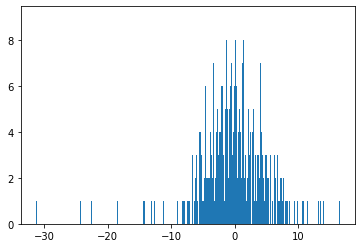

In [15]:
plt.hist(df2["error"] , bins = 405);

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

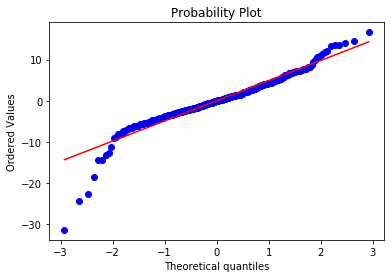

In [16]:
stats.probplot(df2["error"] , plot = plt)
plt.figure

## Now Checking Normality using shapiro wilk test

## H0 = Data is normal
## H1 = Data is not normal 

## Level Of significance is 0.5  

In [68]:
stats.shapiro(df2["error"])

(0.9256545305252075, 2.602155145005336e-13)

## KS test for normal distribution


In [17]:
stats.kstest(df2["error"] , 'norm')

KstestResult(statistic=0.30481356856586034, pvalue=5.647826169413151e-34)

## we can clearly see that P-Value < Sig_Level [ 2.602155145005336e-13 < 0.5 ] so we can reject null hypothesis data is not normal 

## In the both test shapiro wilk and kstest we can see that p_Value is close to zero so 
## we will reject null hypothesis so residual are not normally distributed

## checking Homokedasticity

In [52]:
import seaborn as sns

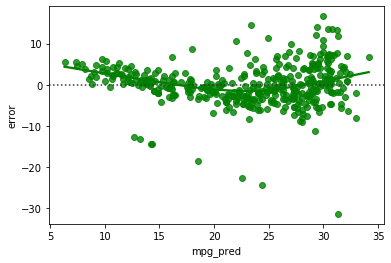

In [53]:
sns.residplot(x=df2["mpg_pred"], y=df2["error"], lowess=True, color="g")

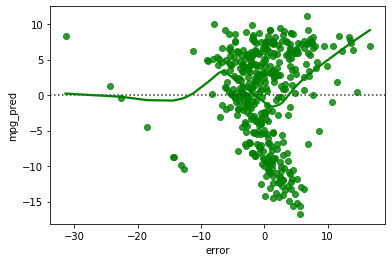

In [54]:
sns.residplot(x=df2["error"], y=df2["mpg_pred"], lowess=True, color="g")

In [56]:
import statsmodels.regression.linear_model as rg
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as dg


In [58]:
reg = rg.OLS( targ , pred, hasconst = bool).fit()
res = reg.resid

In [59]:
res

0      -0.092050
1      -0.616682
2       0.370608
3      -1.645616
4      -0.974293
         ...    
401     1.598682
402    13.617586
403     3.838597
404     1.415689
405     5.054027
Length: 406, dtype: float64

#  Residual Homoscedasticity using  Breusch pagan Test 

## Test Breusch pagan Lagrange multiplier statistic p_value :
### If Breusch pagan lagrange multiplier statistic p_value < alpha  level of statistical significance then residual were heteroscedastic with  1 - Alpha  level of statistical confidence 

###  If Breusch pagan lagrange multiplier statistic p-value > alpha level of statistical significance then residual were homoscedastic with 1 - alpha  level of statistical confidence 

In [66]:
print("= Residual Homoscedasticity Breusch pagan Test ==")
print(' ')
print(" Breusch pagan LM test  statistic" , np.round(dg.het_breuschpagan(res , exog_het = pred)[0] , 4))
print(" Breusch pagan LM test  p value" , np.round(dg.het_breuschpagan(res , exog_het = pred)[1] , 4))


= Residual Homoscedasticity Breusch pagan Test ==
 
 Breusch pagan LM test  statistic 5.0203
 Breusch pagan LM test  p value 0.1703


In [69]:
warnings.filterwarnings("ignore")
%matplotlib inline

## Durbin Watson Test For Autocorrelation

#### Printing Linear Regression Summary

In [71]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           9.56e-88
Time:                        23:38:24   Log-Likelihood:                -1234.8
No. Observations:                 406   AIC:                             2478.
Df Residuals:                     402   BIC:                             2494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6818      0.948     48.194      0.0

<center>  
<h1> Null Hypothesis $H_{0}: \rho=0$ <br>
Alternate Hypothesis $H_{1}: \rho>0$
</h1>
</center>

<center> 
<h1>
$dw=\frac{\sum_{i=2}^{n}\left(e_{i}-e_{i-1}\right)^{2}}{\sum_{i=1}^{n} e_{i}^{2}}$
</h1>
</center>  

<center> 
<h1>
$e_{i}=y_{i}-\hat{y}_{i}$
</h1>
</center>  


<center> 
<h1>
$\begin{array}{ll}{\text { If } dw<d_{L}} & {\text { reject } H_{0}: \rho=0} \\ {\text { If } dw>d_{U}} & {\text { do not reject } H_{0}: \rho=0} \\ {\text { If } d_{L}<dw<d_{U}} & {\text { test is inconclusive. }}\end{array}$
</h1>
</center>  



In [72]:
residual = df2["error"]

In [75]:
residual_df = pd.DataFrame(residual, columns=["error"]).reset_index(drop=True)

In [76]:
residual_df.head()

,error
0,-0.092604
1,-0.617257
2,0.370072
3,-1.646152
4,-0.974834


In [80]:
residual_df["ei"] = residual_df["error"]

In [81]:
residual_df.head(2)

,error,ei
0,-0.092604,-0.092604
1,-0.617257,-0.617257


In [82]:
residual_df['ei_square'] = np.square(residual_df['ei'])

In [83]:
sum_of_squared_residuals = residual_df.sum()["ei_square"]
sum_of_squared_residuals

10417.30891163651

In [84]:
residual_df.head()

,error,ei,ei_square
0,-0.092604,-0.092604,0.008576
1,-0.617257,-0.617257,0.381006
2,0.370072,0.370072,0.136953
3,-1.646152,-1.646152,2.709816
4,-0.974834,-0.974834,0.950301


In [85]:
residual_df['ei_minus_1'] = residual_df['ei'].shift()

In [86]:
residual_df.head()

,error,ei,ei_square,ei_minus_1
0,-0.092604,-0.092604,0.008576,NaN
1,-0.617257,-0.617257,0.381006,-0.092604
2,0.370072,0.370072,0.136953,-0.617257
3,-1.646152,-1.646152,2.709816,0.370072
4,-0.974834,-0.974834,0.950301,-1.646152


In [87]:
residual_df.tail()

,error,ei,ei_square,ei_minus_1
401,1.598236,1.598236,2.554358,2.629600
402,13.617242,13.617242,185.429280,1.598236
403,3.838234,3.838234,14.732040,13.617242
404,1.415269,1.415269,2.002986,3.838234
405,5.053592,5.053592,25.538792,1.415269


In [88]:
residual_df.dropna(inplace=True)

In [91]:
residual_df.shape

(405, 5)

In [92]:
residual_df['ei_sub_ei_minus_1'] = residual_df['ei'] - residual_df['ei_minus_1'] 

In [93]:
residual_df['square_of_ei_sub_ei_minus_1'] = np.square(residual_df['ei_sub_ei_minus_1'])

In [94]:
residual_df.head()

,error,ei,ei_square,ei_minus_1,ei_sub_ei_minus_1,square_of_ei_sub_ei_minus_1
1,-0.617257,-0.617257,0.381006,-0.092604,-0.524653,0.275261
2,0.370072,0.370072,0.136953,-0.617257,0.987329,0.974819
3,-1.646152,-1.646152,2.709816,0.370072,-2.016224,4.065159
4,-0.974834,-0.974834,0.950301,-1.646152,0.671318,0.450668
5,4.257320,4.257320,18.124774,-0.974834,5.232154,27.375435


In [95]:
sum_of_squared_of_difference_residuals = residual_df.sum()["square_of_ei_sub_ei_minus_1"]
sum_of_squared_of_difference_residuals

10819.10742083568

In [96]:
dw = sum_of_squared_of_difference_residuals/sum_of_squared_residuals

In [97]:
dw

1.0385702788126352

## Durbin-Watson:   1.039
## See we got same Value using linear regression summary and the above output

 # No autocorrelation of residuals

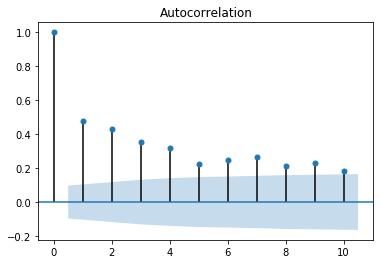

In [98]:
acf = smt.graphics.plot_acf(residual, lags=10 , alpha=0.05)
acf.show()

## Now validating DW test for Auto - correlation 

### Validating lower critical and Upper critical Using DW table  
###### link to table https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf
###### Here *k’ is the number of regressors excluding the intercept which is 3 in our case
###### so we will look at only k = 3 column 
###### N is number of sample size which is 403 in our case so we will take 200 since it is close to 403 in table


##### So our DL =  1.643     and DU = 1.704   

## Now validating DW test

<center>  
<h1> Null Hypothesis $H_{0}: \rho=0$ <br>
Alternate Hypothesis $H_{1}: \rho>0$
</h1>
</center>

<center> 
<h1>
$dw=\frac{\sum_{i=2}^{n}\left(e_{i}-e_{i-1}\right)^{2}}{\sum_{i=1}^{n} e_{i}^{2}}$
</h1>
</center>  

<center> 
<h1>
$e_{i}=y_{i}-\hat{y}_{i}$
</h1>
</center>  


<center> 
<h1>
$\begin{array}{ll}{\text { If } dw<d_{L}} & {\text { reject } H_{0}: \rho=0} \\ {\text { If } dw>d_{U}} & {\text { do not reject } H_{0}: \rho=0} \\ {\text { If } d_{L}<dw<d_{U}} & {\text { test is inconclusive. }}\end{array}$
</h1>
</center>  



In [100]:
dw

1.0385702788126352

# So DW < DL and DW < DU
## so reject H0 so there is no auto- correlation among Residuals



## Checking Multicollinearity 
## Using Variance Inflation  Factor 

### Taking All the Feature Variable From Cars Data set 

In [11]:
names = ["MPG" ,"Cylinders" ,"Displacement", "Horsepower" ,"Weight" ,"Acceleration" ,  "Model"]

In [12]:
inp_df = df[["MPG" ,"Cylinders" ,"Displacement", "Horsepower" ,"Weight" ,"Acceleration" ,  "Model"]]

In [13]:
for i in range(0, len(names)):
    y = inp_df.loc[:, inp_df.columns == names[i]]
    x = inp_df.loc[:, inp_df.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of MPG column is 0.97 keeping all other columns as features
Variance Inflation Factor of MPG column is 32.64 

R Square value of Cylinders column is 0.99 keeping all other columns as features
Variance Inflation Factor of Cylinders column is 116.82 

R Square value of Displacement column is 0.99 keeping all other columns as features
Variance Inflation Factor of Displacement column is 87.59 

R Square value of Horsepower column is 0.98 keeping all other columns as features
Variance Inflation Factor of Horsepower column is 41.32 

R Square value of Weight column is 0.99 keeping all other columns as features
Variance Inflation Factor of Weight column is 153.6 

R Square value of Acceleration column is 0.98 keeping all other columns as features
Variance Inflation Factor of Acceleration column is 62.85 

R Square value of Model column is 1.0 keeping all other columns as features
Variance Inflation Factor of Model column is 216.84 



## Now we can drop the variable with High VIF   

## We can see that Variable with VIF > 10 shows multicolinearity so adding more variable to the model won't give any new information 

## Let's check by using linear regression on one variable and calculating R^2 and then using linear regression on 
## with more features and then again calculting RMSE and checking difference 

In [43]:
y1 = df[["MPG"]]
x1 = df[["Weight"]]

In [44]:
model = sm.OLS(y1, x1)
results = model.fit()
rsq1 = results.rsquared

In [45]:
rsq1

0.6895018833469007

In [27]:
y2 = df[["MPG"]]
x2 = df[["MPG" ,"Cylinders" ,"Displacement", "Horsepower" ,"Weight" ,"Acceleration" ,  "Model"]]

In [30]:
model = sm.OLS(y2, x2)
results = model.fit()
rsq2 = results.rsquared

In [31]:
rsq2

1.0

In [42]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
inp_df = df[["MPG" ,"Cylinders" ,"Displacement", "Horsepower" ,"Weight" ,"Acceleration" ,  "Model"]]

## VIF Using Inbuilt library

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  

# the independent variables set 
X = inp_df 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

        feature         VIF
0           MPG   32.641703
1     Cylinders  116.817789
2  Displacement   87.592277
3    Horsepower   41.315071
4        Weight  153.596509
5  Acceleration   62.851204
6         Model  216.837122
